# CME / Pencil Code

In [1]:
from CME_pipline import *
import pencil as pc

$ conda install -c plotly plotly-orca psutil requests


In [2]:
cfg = Config()

cfg.make_anim_hel = False
cfg.make_anim_mag = False
cfg.make_anim_hel_frac = False

In [3]:
sims = discover_sims(cfg.ROOT)
[s.name for s in sims]   # type: ignore
#target = "256_gamma3_new_source7_lambda1e12_k500"
target = "1024_gamma3_new_source7_k200b"
sim = [s for s in sims if s.name == target][0] # type: ignore

? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7
? WARNING: No simulation found in /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7_k1000 -> try get_sims maybe?
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7_k200b
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7_k500
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/128_gamma3_new_source7_k3000
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/128_gamma3_new_source7_lambda2e8_k1000
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/256_gamma3_new_source7_lambda16e8_k500
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/256_gamma3_new_source7_lambda16e9_k500
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/256_gamma3_new_source7_lambda1e12_k500
? WARNING: C

Detected runs: ['1024_gamma3_new_source7_k200b']
appending hel_kin
appending hel_mag
appending sp
appending krms
appending mag
appending kin
powerhel_kin.dat


/home/mgurgeni/pencil-code/python/pencil/read/powers.py:388: UserWarning:

grid.dat not found. Assuming the box is cubical.



powerhel_mag.dat
power_sp.dat
power_krms.dat
power_mag.dat
power_kin.dat
Read 700 lines.
___________200.0_______________________
reading sim 1024_gamma3_new_source7_k200b:
average helicity at last timestep: 2.888999915739987e-05 
[1024_gamma3_new_source7_k200b] helicity_fraction_alltimes: EmA.shape[0]=22, len(tt_for_cmap)=22


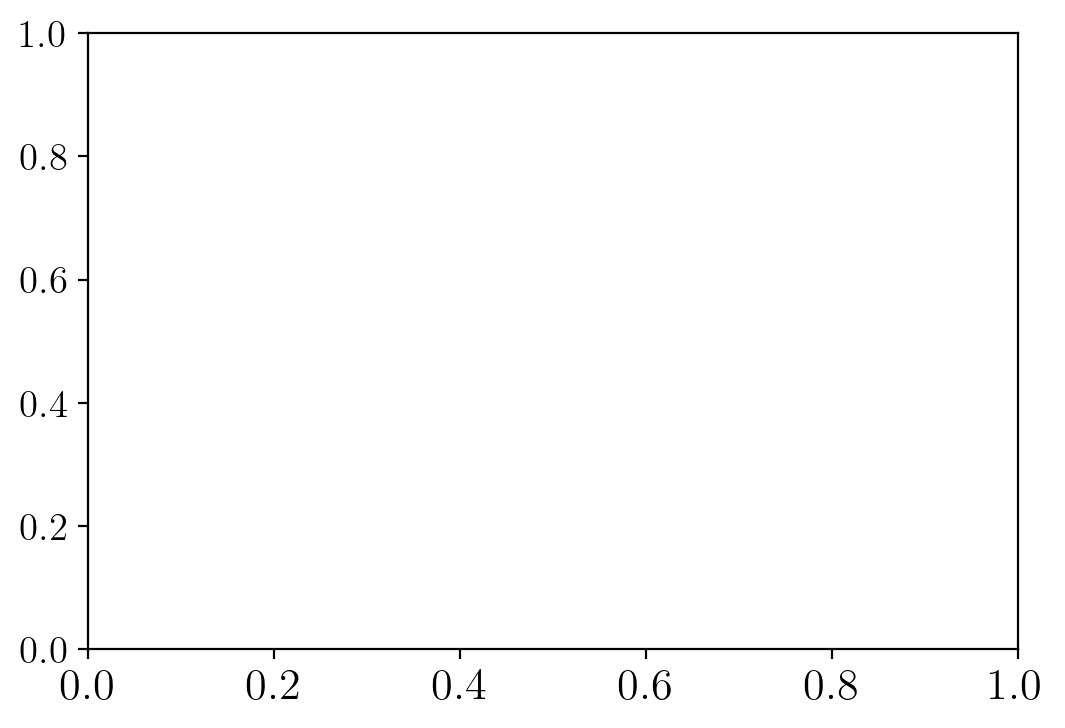

In [4]:
run_pipeline(cfg, sims_override=[sim]) # [sim] if you wnat to see something specific 

Read 5000 lines.
Read 6914 lines.
Read 6929 lines.
Read 33 lines.


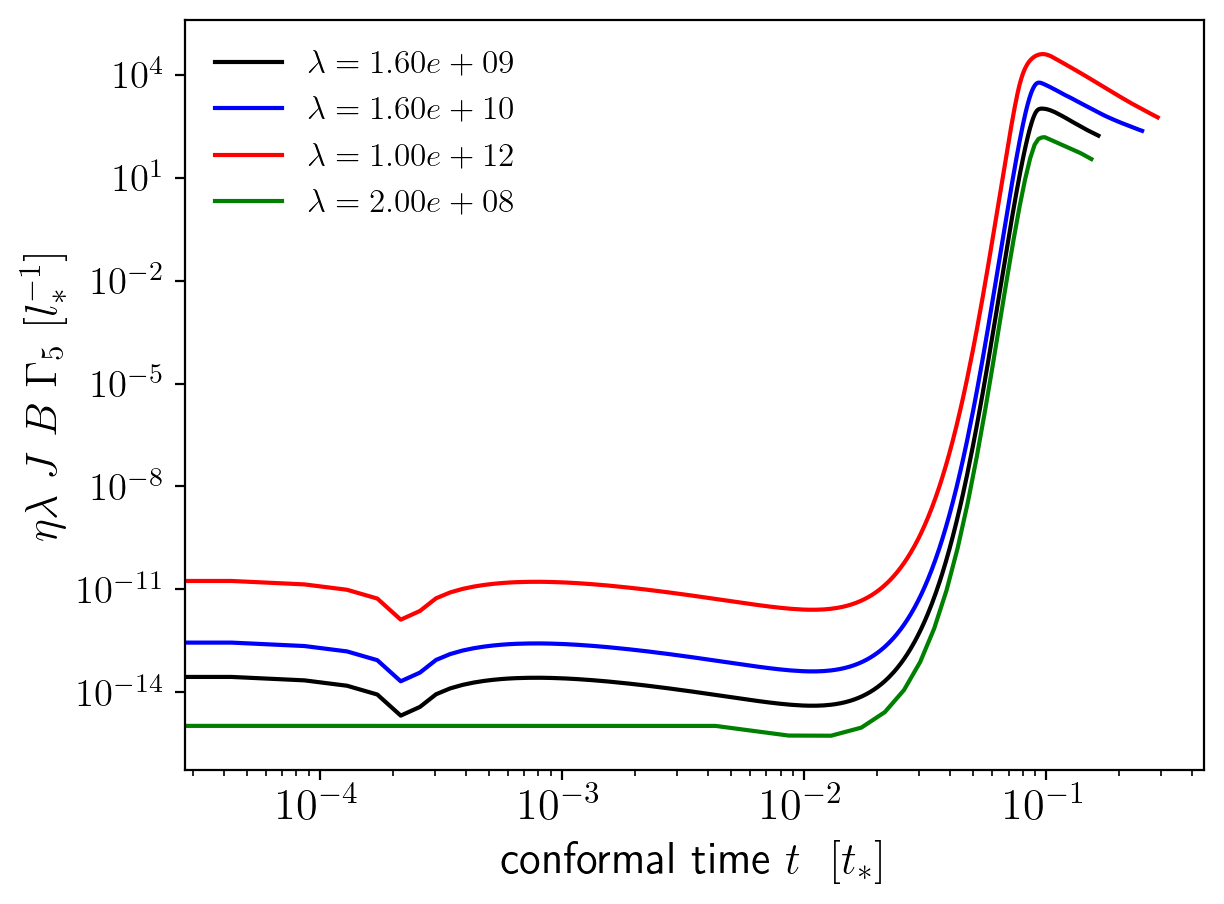

Read 5000 lines.
Read 6914 lines.
Read 6929 lines.
Read 33 lines.


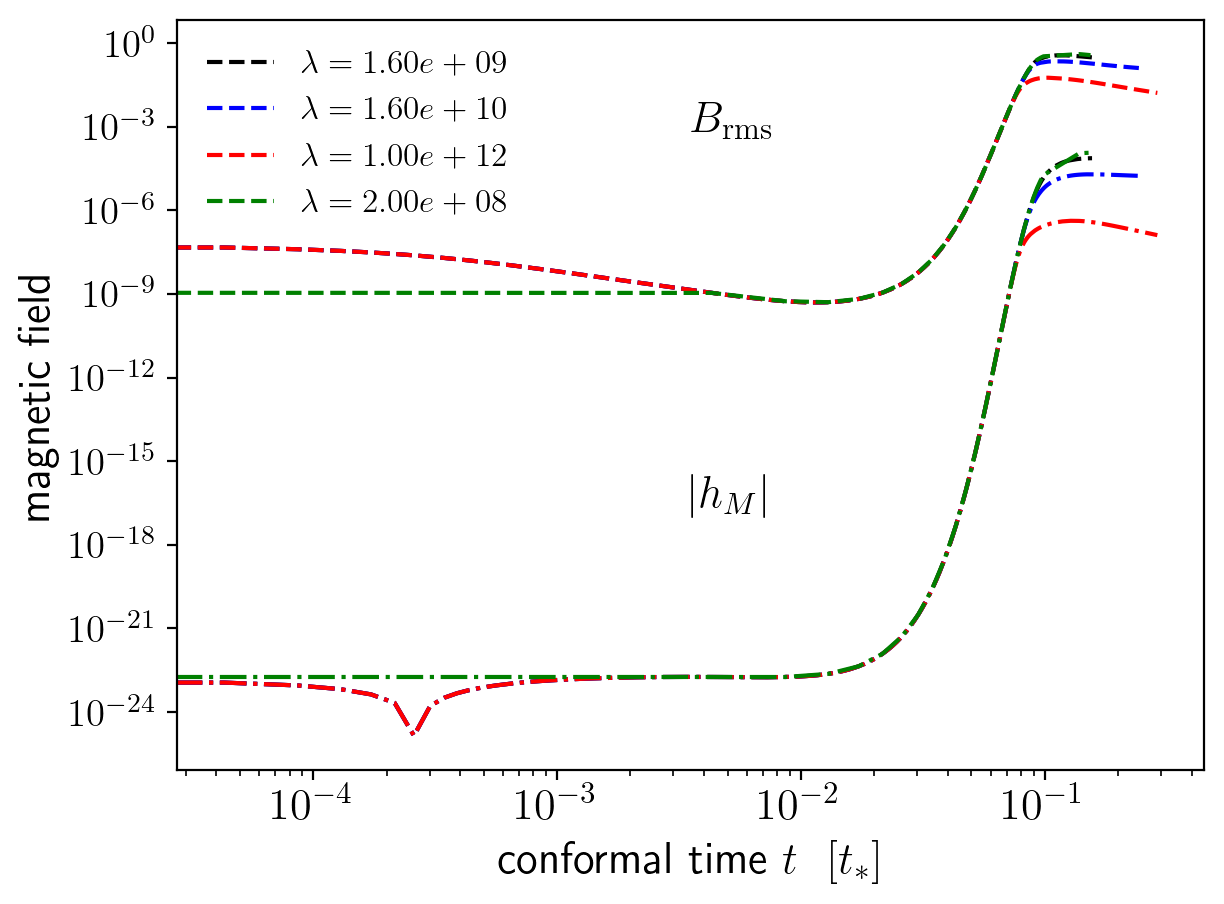

In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

colors = ["black", "blue", "red", "green", "orange", "purple"]
color_cycle = itertools.cycle(colors)

lambda_to_color = {}

for sim in sims:
    if sim.name.startswith("256") and not any(x in sim.name for x in ["4e8", "8e8"]):
        pars = pc.read.param(datadir=sim.datadir, param2=True)
        lam = getattr(pars, "lambda5", None)
        if lam is not None and lam not in lambda_to_color:
            lambda_to_color[lam] = next(color_cycle)



plt.figure()
for sim in sims:
    if sim.name.startswith("256") and not any(x in sim.name for x in ["4e8", "8e8"]):
        ts   = pc.read.ts(datadir=sim.datadir)
        pars = pc.read.param(datadir=sim.datadir, param2=True)
        lam  = getattr(pars, "lambda5", None)
        eta  = getattr(pars, "eta", None)
        gamma = getattr(pars, "gammaf5", None)

        if lam is None: 
            continue

        color = lambda_to_color.get(lam, "gray")
        t = np.asarray(ts.t) - cfg.t_offset
        JBm = np.asarray(ts.jbm)

        plt.loglog(t, np.abs(lam * eta * (-JBm)) / gamma,
                   label=rf"$\lambda = {lam:.2e}$",
                   color=color)

plt.xlabel(r"conformal time $t~~[t_*]$")
plt.ylabel(r"$\eta\lambda ~J ~B ~\Gamma_5~[l_*^{-1}]$")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
handles, labels = [], []

for sim in sims:
    if not sim.name.startswith("256") or any(x in sim.name for x in ["4e8", "8e8","2e2"]):
        continue

    ts   = pc.read.ts(datadir=sim.datadir)
    pars = pc.read.param(datadir=sim.datadir, param2=True)
    lam  = getattr(pars, "lambda5", None)

    if lam is None: 
        continue

    color = lambda_to_color.get(lam, "gray")

    t    = np.asarray(ts.t) - cfg.t_offset
    brms = np.asarray(ts.brms)
    hel  = np.asarray(ts.abm)

    hB, = ax.loglog(t, np.abs(brms), "--", color=color,
                    label=rf"$\lambda = {lam:.2e}$")
    ax.loglog(t, np.abs(hel), "-.", color=color)

    handles.append(hB)
    labels.append(rf"$\lambda = {lam:.2e}$")

ax.set_xlabel(r"conformal time $t~~[t_*]$")
ax.set_ylabel(r"magnetic field")
ax.legend(handles, labels, frameon=False)

ax.text(0.5, 0.85, r"$B_{\mathrm{rms}}$", transform=ax.transAxes)
ax.text(0.5, 0.35, r"$|h_M|$", transform=ax.transAxes)

plt.tight_layout()
plt.show()





In [6]:
h = 2.88e-05 

ELm2 = 1.97 * 10 ** (-21)  # G^2  Mpc a_0^3
G2d2 = 24.8  # Gev/cm^3

h_filal = h * ELm2 * G2d2 ## Gev/cm^3 Mpc a_0^3
print(h_filal)

1.4070528e-24


In [7]:
colors = ["black", "blue", "red", "green", "orange", "purple"]
color_cycle = itertools.cycle(colors)

lambda_to_color = {}

for sim in sims:
    if sim.name.startswith("256") and not any(x in sim.name for x in ["4e8", "8e8"]):
        pars = pc.read.param(datadir=sim.datadir, param2=True)
        lam = getattr(pars, "lambda5", None)
        if lam is not None and lam not in lambda_to_color:
            lambda_to_color[lam] = next(color_cycle)


Read 700 lines.
Read 5000 lines.
Read 6914 lines.
Read 6929 lines.


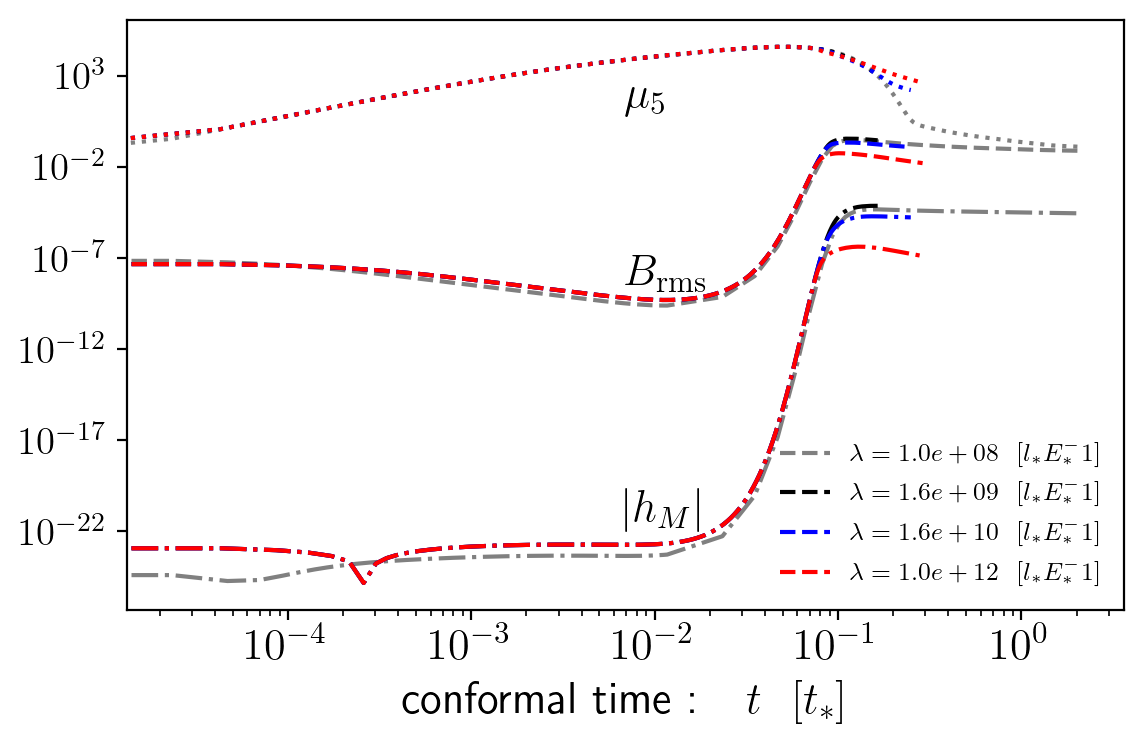

In [ ]:
# One combined figure in the "Brms" style, but with multiple runs
fig, ax = plt.subplots(figsize=(6, 4))

handles, labels = [], []

for sim in sims:
    # same filtering you had
    if sim.name == "1024_gamma3_new_source7_k200b":
        pass
    elif (not sim.name.startswith("256")) or any(x in sim.name for x in ["4e8", "8e8", "2e8"]):
        continue

    ts   = pc.read.ts(datadir=sim.datadir)
    pars = pc.read.param(datadir=sim.datadir, param2=True)
    lam  = getattr(pars, "lambda5", None)

    if lam is None:
        continue

    color = lambda_to_color.get(lam, "gray")

    t    = np.asarray(ts.t) - cfg.t_offset
    brms = np.asarray(ts.brms)
    hel  = np.asarray(ts.abm)
    mu5 = np.asarray(ts.mu5m)

    # Match pipeline styles: Brms dashed, |h_M| dash-dot
    hB, = ax.loglog(t, np.abs(brms), "--", color=color,
                    label=rf"$\lambda = {lam:.2e}$")
    ax.loglog(t, np.abs(hel), "-.", color=color)
    ax.loglog(t, np.abs(mu5), ":", color=color,label = rf"$\lambda = {lam:.2e} ~~ [l_*E_*^{-1}]$")
    handles.append(hB)
    labels.append(rf"$\lambda = {lam:.1e}~~ [l_*E_*^{-1}]$")

# Axis labels identical to plot_ts_brms_and_hel
ax.set_xlabel(r"conformal time :~~ $t~~ [t_*]$")

ax.legend(handles, labels, frameon=False, loc="lower right", fontsize=12)


# Optional annotations like in your custom figure:
ax.text(0.5, 0.55, r"$B_{\mathrm{rms}}$", transform=ax.transAxes)
ax.text(0.5, 0.15, r"$|h_M|$",       transform=ax.transAxes)
ax.text(0.5, 0.85, r"$\mu_5$",       transform=ax.transAxes)



plt.tight_layout()
plt.show()


In [13]:
# choose a synthetic "run name" for the comparison figure
run_label = "all_runs"

out_base = fig_path(cfg.FIG_DIR, run_label, "Brms_multi")[:-4]  # strip ".pdf"
export_for_slides(fig, out_base)
